#Integrantes
+ Andrés Felipe Donoso Diaz 201729427 

* Juan Guillermo Lobatón Galindo 201615260 

* Víctor Garzón Marín 201711753 

* Luis Felipe Rivera Garcia 201424278 
* Julian David Pardo

Junto con el archivo se adjunta el token que se debe utilizar en este sección

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guillermolobaton","key":"82eed0aa0bfe244b4bee2aa257366912"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

kaggle.json


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset


 95% 39.0M/41.0M [00:01<00:00, 8.53MB/s]
100% 41.0M/41.0M [00:01<00:00, 21.8MB/s]


In [ ]:
!unzip fake-and-real-news-dataset

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 34.1MB 767kB/s
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 604kB 11.6MB/s 
     |████████████████████████████████| 3.1MB 24.1MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 296kB 58.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=f4e35803bebec4576bd1ce1605ba0a585f43a7826dfb55d0d47dd8f1b6b12226
  Stored in directory: /tmp/pip-ephem-wheel-cache-42ay1_zy/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=e084a503b37f9e4472cf7c459f6ac3504ae91d710d9e53562cfd3c85afb748d0
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2

In [ ]:
!pip install contractions
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

#***0. Se Cargan las librerías necesarias***

In [ ]:
%matplotlib inline
import pandas as pd
import sys
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from pandas_profiling import ProfileReport
import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,MultinomialNB,ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
 
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#***1. Se Carga la información***

## Fuente de los datos

Los datos con los que se utilizaran de aqui en adeante fueron obtenidos de un data set en Kaggle bajo e titulo Fake and real news dataset.

### Acknowledgements

* Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

* Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

### link al Data set

* https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [ ]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

#***2. Tratamiento inicial de datos*** 



1.   Poner etiquetas apropiadas en los datasets que reflejen sí un noticia es falsa o verdadera
2.   Unir los datasets 




In [ ]:
fake['label'] = 0
true['label'] = 1
dataset = pd.concat([true, fake])
dataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
ProfileReport(dataset)

###***2.1 Tareas de tratamiento de datos***

Se deciden ejecutar las siguientes tareas sobre el dataset
1.   Se separan los conjuntos de train y test
2.   Se eliminan las columnas subject y date
3.   Se unen las columnas title y text y se hace un perfilamiento más produndo

Esta desicion se toma con base en las siguientes observacion de la data
1.   subject y date no aportan informacion adicional o necesaria para ayudar a nuestro modelo a identificar fake news razon por la cual se eliminan buscando un data set mas liviano.
2.   Se unen las columnas title y text de tal manera que la informacion del titulo pueda ser agregada al bag of words y su información pueda ser tenida en cuenta.
3. No se consideran necesarios trabajos adicionales de limpieza de datos en esta primera parte.

In [ ]:
X, y = dataset[['title','text']],dataset['label']
y

0        1
1        1
2        1
3        1
4        1
        ..
23476    0
23477    0
23478    0
23479    0
23480    0
Name: label, Length: 44898, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 33 )

In [ ]:
dataset= X_train
dataset

,title,text
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...,"NYPD assaulting protestors, violent arrests ha..."
1371,EPA watchdog expands audit of administrator's ...,WASHINGTON (Reuters) - The U.S. Environmental ...
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...,The co-chair of Trump s voter fraud commission...
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...,WOULDN T YOU LIKE TO KNOW THE GRAND TOTAL AND ...
20535,Brazil top prosecutor requests billionaire Bat...,BRASILIA/SAO PAULO (Reuters) - Brazil s top pr...
...,...,...
5865,"Republican Leaders Turn On Trump, Side With P...",Donald Trump is becoming a liability to the Re...
578,White House promises welfare overhaul details ...,WASHINGTON (Reuters) - U.S. President Donald T...
17199,THIS BIG ANNOUNCEMENT IS YET ANOTHER REASON NO...,Another turn left for the Hillster so no schoo...
2439,TransCanada to make final decision on Keystone...,"(Reuters) - TransCanada Corp, Canada’s No.2 pi..."


In [ ]:
#dataset = dataset.drop(['subject', 'date'], axis = 1)
dataset['text1'] = dataset['title'] + dataset['text']
dataset= dataset.drop(['title','text'], axis = 1)
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text1
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...
1371,EPA watchdog expands audit of administrator's ...
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...
20535,Brazil top prosecutor requests billionaire Bat...
...,...
5865,"Republican Leaders Turn On Trump, Side With P..."
578,White House promises welfare overhaul details ...
17199,THIS BIG ANNOUNCEMENT IS YET ANOTHER REASON NO...
2439,TransCanada to make final decision on Keystone...


In [ ]:
textos = dataset.copy()
textos['Conteo'] = [len(x) for x in textos['text1']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['text1']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['text1']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['text1']]

ProfileReport(textos)

#***3. Tratamiento de datos de texto***

###***3.1 Tareas iniciales***

Se hacen las tres tareas primordiales de preparación de textos


1.   Eliminación de ruido
2.   Tokenización.
3.   Normalización.

Estas tres tareas permiten dejar el texto listo para convertirlo en alguna representación que pueda ser interpretada de manera apropiada por los algoritmos que se planea utilizar.


Eliminación de ruido

In [ ]:
#Remueve los caracteres que no corresponden a ASCI 
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#Pasa todas las palabras a minuscula
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#Remueve los signos de puntuación
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#Convierte los números en caracteres string
def replace_numbers(words):
    
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

#Remueve las stop words o palabras vacías
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

#Junta todos los métodos previamente listados 
def preproccesing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

 


*   Contracciones - Deshace las diferentes contracciones presentes en el idioma ingles




In [ ]:
dataset['text1'] = dataset['text1'].apply(contractions.fix)
dataset.head()

,text1
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...
1371,EPA watchdog expands audit of administrator's ...
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...
20535,Brazil top prosecutor requests billionaire Bat...


* Tokenización - Extrae las diferentes palabras de cada uno de los textos


In [ ]:
dataset['words'] = dataset['text1'].apply(word_tokenize) 
dataset.head()

,text1,words
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...,"[BREAKING, :, NYC, PROTEST, GETS, UGLY, :, Ant..."
1371,EPA watchdog expands audit of administrator's ...,"[EPA, watchdog, expands, audit, of, administra..."
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...,"[Co-Chair, Of, Trump, ’, s, Voter, Fraud, Comm..."
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...,"[WATCH, HER, SKI, !, AMERICAN, TAXPAYERS, ON, ..."
20535,Brazil top prosecutor requests billionaire Bat...,"[Brazil, top, prosecutor, requests, billionair..."


* Eliminación de ruido - Se aplican los diferentes metodos que hacen parte del preprocesamiento

In [ ]:
dataset['words'] = dataset['words'].apply(preproccesing) 
dataset.head()

,text1,words
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...,"[breaking, nyc, protest, gets, ugly, antiameri..."
1371,EPA watchdog expands audit of administrator's ...,"[epa, watchdog, expands, audit, administrator,..."
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...,"[cochair, trump, voter, fraud, commission, say..."
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...,"[watch, ski, american, taxpayers, hook, aspen,..."
20535,Brazil top prosecutor requests billionaire Bat...,"[brazil, top, prosecutor, requests, billionair..."


Se muestran las palabras y la frecuencia que tiene cada una.
Esto se hace con el objetivo de encontrar las palabras más aparecen y que por lo tanto pueden ser las más relevantes.

In [ ]:
palabras = []
for m in dataset['words']:
  palabras+= m

m = nltk.FreqDist(palabras)


In [ ]:
sorted_frequencies = sorted(m.items(), key=lambda x:x[1],reverse = True)

In [ ]:
arr  =[m[1] for m in sorted_frequencies ]
#palabras_conservar = [m[0] for m in sorted_frequencies  if m[1] > 2*mean]
#print(len(sorted_frequencies))
#len(palabras_conservar)
mean = np.mean(arr)
ma = np.max(arr)
ma

107774

Al momento de hacer las representaciones se tomara la media*2 como criterio para seleccionar las palabras más importantes.

Normalización.


*   Se hace stemming y lemmatización para llevar las palabras del texto a su forma canonica. 


In [ ]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

dataset['words'] = dataset['words'].apply(stem_and_lemmatize) 
dataset.head()

,text1,words
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...,"[break, nyc, protest, get, ug, antiam, protest..."
1371,EPA watchdog expands audit of administrator's ...,"[ep, watchdog, expand, audit, admin, travel, m..."
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...,"[cochair, trump, vot, fraud, commit, say, trum..."
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...,"[watch, ski, am, taxpay, hook, asp, trip, firs..."
20535,Brazil top prosecutor requests billionaire Bat...,"[brazil, top, prosecut, request, billionair, b..."


Seleccion de campos
Se convierten las listas de palabras previamente procesadas en un solo string

In [ ]:
dataset['words'] = dataset['words'].apply(lambda x: ' '.join(map(str, x)))
dataset

,text1,words
20739,BREAKING: NYC PROTEST GETS UGLY: Anti-American...,break nyc protest get ug antiam protest battl ...
1371,EPA watchdog expands audit of administrator's ...,ep watchdog expand audit admin travel memowash...
825,Co-Chair Of Trump’s Voter Fraud Commission Sa...,cochair trump vot fraud commit say trump may l...
17363,WATCH HER SKI! AMERICAN TAXPAYERS ON THE HOOK ...,watch ski am taxpay hook asp trip first ladywo...
20535,Brazil top prosecutor requests billionaire Bat...,brazil top prosecut request billionair batist ...
...,...,...
5865,"Republican Leaders Turn On Trump, Side With P...",republ lead turn trump sid presid obamadonald ...
578,White House promises welfare overhaul details ...,whit hous prom welf overha detail ear next yea...
17199,THIS BIG ANNOUNCEMENT IS YET ANOTHER REASON NO...,big annount yet anoth reason vot hil clintonan...
2439,TransCanada to make final decision on Keystone...,transcanad mak fin decid keyston xl decemb reu...


Se separan los textos de las etiquetas 

In [ ]:
X_train = dataset['words']
#X, y = dataset['words'],dataset['label']
#y

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 33 )

###***3.2 transformaciones***



1.   Binario
2.   Conteo de palabras presentes
3.   Term-frecuency times inverse Document-frecuency

Se realizan las 3 transformaciones de tal manera que los datos se encuentren preparados para la mayor cantidad posible de algoritmos en la siguiente etapa del proyecto.

En cada una de ellas se utilizan ngramas con el fin de encontrar relaciones que podrían ser significativas en los documentos.


Binario

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
dummy = CountVectorizer(binary=True, ngram_range=(1, 2))
X_dummy = dummy.fit_transform(X_train)
print(X_dummy.shape)
#X_dummy.toarray()[0]

(33673, 5329144)


Conteo de palabras presentes

In [ ]:
count = CountVectorizer(ngram_range=(1, 2))
X_count = count.fit_transform(X_train)
print(X_count.shape)
#X_count.toarray()[0]

(33673, 5329144)


Term-frecuency times inverse Document-frecuency

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1, 2))
X_tf_idf = tf_idf.fit_transform(X_train)
print(X_tf_idf.shape)
#X_tf_idf.toarray()[0]

(33673, 5329144)


Se prepara el conjunto de test

In [ ]:
X_test

,title,text
19346,Slovenian PM cancels Croatia visit over mariti...,LJUBLJANA (Reuters) - Slovenia s Prime Ministe...
5247,‘White Lives Matter’ Rally Breaks Out In Chao...,As many of us could have predicted would be th...
4114,Trump says Mexico 'eventually' will pay for bo...,WASHINGTON (Reuters) - President Donald Trump ...
8443,Trump says he would bar top aides from accepti...,"WEST BEND, Wis. (Reuters) - Republican preside..."
9684,SHERIFF CLARKE CALLS OUT NFL For Latest Move T...,Sheriff Clarke has it right! The NFL wasn t li...
...,...,...
5864,Saudi Prince Reminds Donald Trump: I Bailed Y...,While Donald Trump continues to paint himself ...
6295,Trump vows 'insurance for everybody' in replac...,WASHINGTON (Reuters) - U.S. President-elect Do...
16257,MIC DROP MOMENT: Veteran Senator Asked By A Te...,When President Donald Trump visited the CIA Sa...
3399,Former Trump Adviser ANNHILIHATES His Own ‘Fa...,"Trump s current national security adviser, Gen..."


In [ ]:
X_test['words'] = X_test['title'] + X_test['text']
X_test = X_test['words']
#X_test = tf_idf.transform(X_test)
#X_test['words']

# Entrega 3

## 3. Modelamiento
La primera aproximación que utilizaremos es un clasificador de Bayes ingenuo. Dado que existen diferentes clasificadores de Bayes ingenuos, utilizaremos grid search para hacer la selección del que mejor se adapte a los datos.

In [ ]:
estimators = [('transform', TfidfVectorizer(stop_words='english')), ('clf', BernoulliNB())]
pipe = Pipeline(estimators)
param_grid = dict(
    transform=[
        TfidfVectorizer(stop_words='english'),
        CountVectorizer(stop_words='english'),
        HashingVectorizer(stop_words='english',
                          n_features=2**13)
    ], clf = [
        BernoulliNB(),
        CategoricalNB(),
        MultinomialNB(),
        ComplementNB()
    ])
grid_search_NB = GridSearchCV(pipe, param_grid=param_grid,verbose = 20,n_jobs=-1,error_score=0.0)
grid_search_NB.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused b

GridSearchCV(cv=None, error_score=0.0,
             estimator=Pipeline(memory=None,
                                steps=[('transform',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                  

In [ ]:
grid_search_NB.best_estimator_

Pipeline(memory=None,
         steps=[('transform',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=F

Vemos que la mejor selección del clasificador obtenido es un Bayes Ingenuo Bernoulli, utilizando una transformación de palabras por frecuencia

## 4. Validación
Para validar el modelo sugerido por GridSearch realizaremos una predicción de los datos contenidos en Test.

In [ ]:
X_test

19346    Slovenian PM cancels Croatia visit over mariti...
5247      ‘White Lives Matter’ Rally Breaks Out In Chao...
4114     Trump says Mexico 'eventually' will pay for bo...
8443     Trump says he would bar top aides from accepti...
9684     SHERIFF CLARKE CALLS OUT NFL For Latest Move T...
                               ...                        
5864      Saudi Prince Reminds Donald Trump: I Bailed Y...
6295     Trump vows 'insurance for everybody' in replac...
16257    MIC DROP MOMENT: Veteran Senator Asked By A Te...
3399      Former Trump Adviser ANNHILIHATES His Own ‘Fa...
6020     Trump says illegal migrants brought as childre...
Name: words, Length: 11225, dtype: object

In [ ]:
NB = grid_search_NB.best_estimator_
y_pred_NB = NB.predict(X_test)
y_pred_NB

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
categories = ['fake', 'true'];

In [ ]:
report_NB = classification_report(y_test, y_pred_NB,target_names=categories)

print("Test Report for Näive Bayes\n", report_NB)
print("Confusion Matrix for Näive Bayes\n", confusion_matrix(y_test, y_pred_NB))

Test Report for Näive Bayes
               precision    recall  f1-score   support

        fake       0.92      0.99      0.95      5816
        true       0.98      0.91      0.95      5409

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

Confusion Matrix for Näive Bayes
 [[5729   87]
 [ 474 4935]]


El reporte obtenido muestra excelentes resultados tanto en precisión como recall, y por supuesto en f1-score. Esto nos indica que tenemos un clasificador muy bueno para separar las diferentes categorías.

In [ ]:
precision = dict()
recall = dict()
n_classes = 2

In [ ]:
y_score = NB.predict_proba(X_test)

In [ ]:
Y_test = []
for t in y_test:
    if t == 0:
        Y_test.append([1,0])
    elif t == 1:
        Y_test.append([0,1])
Y_test = np.array(Y_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.99


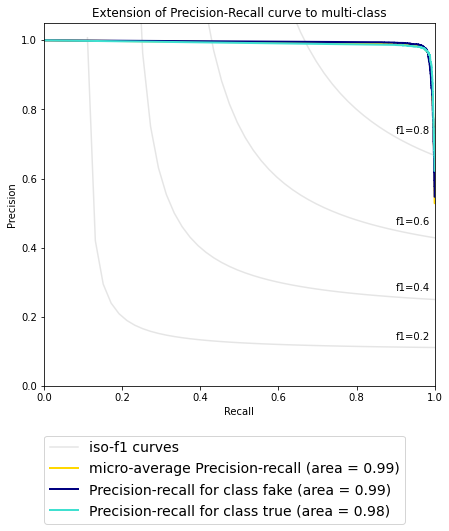

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(categories[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

# Ensemblers

Se decide probar con modelos más complejos como lo son los ensemblers. En particular se utilizan tres tipos distintos. Random forest, Bagging y Boosting.

In [ ]:
estimators = [('transform', CountVectorizer(stop_words='english')), 
              ('clf', BaggingClassifier(base_estimator=SVC(kernel='rbf'), random_state=0))]
pipe = Pipeline(estimators)
param_grid_EN = dict(transform=[TfidfVectorizer(stop_words='english'), CountVectorizer(stop_words='english'), HashingVectorizer(stop_words='english',n_features=2**13)],
                  clf = [RandomForestClassifier(random_state=0),
                         BaggingClassifier(base_estimator=SVC(kernel='rbf'), random_state=0),
                         AdaBoostClassifier(random_state=0)],
                  clf__n_estimators=[10,20,50],
                  )
grid_search_EN = GridSearchCV(pipe, param_grid=param_grid_EN,verbose = 20,n_jobs=-1,error_score=0.0)
grid_search_EN.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(error_score=0.0,
             estimator=Pipeline(steps=[('transform',
                                        CountVectorizer(stop_words='english')),
                                       ('clf',
                                        BaggingClassifier(base_estimator=SVC(),
                                                          random_state=0))]),
             n_jobs=-1,
             param_grid={'clf': [RandomForestClassifier(random_state=0),
                                 BaggingClassifier(base_estimator=SVC(),
                                                   random_state=0),
                                 AdaBoostClassifier(random_state=0)],
                         'clf__n_estimators': [10, 20, 50],
                         'transform': [TfidfVectorizer(stop_words='english'),
                                       CountVectorizer(stop_words='english'),
                                       HashingVectorizer(n_features=8192,
                                  

In [ ]:
grid_search_EN.best_estimator_

Pipeline(steps=[('transform', CountVectorizer(stop_words='english')),
                ('clf', AdaBoostClassifier(random_state=0))])

In [ ]:
EN = grid_search_EN.best_estimator_
y_pred_EN = EN.predict(X_test)
y_pred_EN

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
report_EN= classification_report(y_test, y_pred_EN,target_names=categories)

print("Test Report for Ensemblers\n", report_EN)
print("Confusion Matrix for Ensemblers\n", confusion_matrix(y_test, y_pred_EN))

Test Report for Ensemblers
               precision    recall  f1-score   support

        fake       1.00      1.00      1.00       606
        true       1.00      1.00      1.00       517

    accuracy                           1.00      1123
   macro avg       1.00      1.00      1.00      1123
weighted avg       1.00      1.00      1.00      1123

Confusion Matrix for Ensemblers
 [[606   0]
 [  1 516]]


In [ ]:
precision_EN = dict()
recall_EN = dict()
n_classes = 2

In [ ]:
y_score_EN = EN.predict_proba(X_test)

In [ ]:
Y_test_EN = []
for t in y_test:
    if t == 0:
        Y_test_EN.append([1,0])
    elif t == 1:
        Y_test_EN.append([0,1])
Y_test_EN = np.array(Y_test_EN)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision_EN = dict()
recall_EN = dict()
average_precision_EN = dict()
for i in range(n_classes):
    precision_EN[i], recall_EN[i], _ = precision_recall_curve(Y_test_EN[:, i],
                                                        y_score_EN[:, i])
    average_precision[i] = average_precision_score(Y_test_EN[:, i], y_score_EN[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_EN["micro"], recall_EN["micro"], _ = precision_recall_curve(Y_test_EN.ravel(),
    y_score_EN.ravel())
average_precision["micro"] = average_precision_score(Y_test_EN, y_score_EN,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


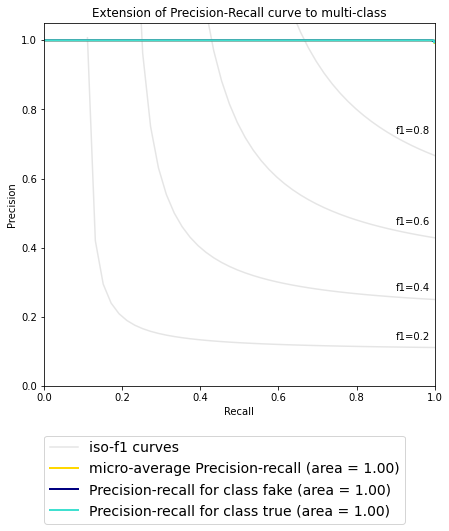

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall_EN["micro"], precision_EN["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall_EN[i], precision_EN[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(categories[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

### MLP Para clasificación de texto
Se utlilizaran 2 capas ocultas, para la entrada de palabras se utilizará el CountVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_count.toarray(), y.values, test_size=0.2, random_state=33)
mlp = Sequential()
mlp.add(Dense(1024, input_dim=X_count.toarray()[0].shape[0]))
mlp.add(Activation('relu'))
mlp.add(Dense(1024))
mlp.add(Activation('sigmoid'))
mlp.add(Dense(1))
mlp.add(Activation('sigmoid'))
mlp.build()
mlp.summary()
mlp.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              72818688  
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 73,869,313
Trainable params: 73,869,313
Non-trainable params: 0
____________________________________________

In [ ]:
mlp.fit(X_train, y_train, epochs=30, batch_size=1024)

Epoch 1/30
4/4 [==============================] - 1s 178ms/step - loss: 0.7326 - acc: 0.5094
Epoch 2/30
4/4 [==============================] - 1s 169ms/step - loss: 0.6846 - acc: 0.6091
Epoch 3/30
4/4 [==============================] - 1s 184ms/step - loss: 0.6781 - acc: 0.6541
Epoch 4/30
4/4 [==============================] - 1s 186ms/step - loss: 0.6713 - acc: 0.7219
Epoch 5/30
4/4 [==============================] - 1s 179ms/step - loss: 0.6644 - acc: 0.7394
Epoch 6/30
4/4 [==============================] - 1s 172ms/step - loss: 0.6585 - acc: 0.7119
Epoch 7/30
4/4 [==============================] - 1s 176ms/step - loss: 0.6505 - acc: 0.7862
Epoch 8/30
4/4 [==============================] - 1s 174ms/step - loss: 0.6432 - acc: 0.7653
Epoch 9/30
4/4 [==============================] - 1s 197ms/step - loss: 0.6367 - acc: 0.8000
Epoch 10/30
4/4 [==============================] - 1s 190ms/step - loss: 0.6291 - acc: 0.7706
Epoch 11/30
4/4 [==============================] - 1s 190ms/step - lo

In [ ]:
print(classification_report(y_test, np.round(mlp.predict(X_test))))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       423
           1       0.90      0.87      0.89       377

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.90       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
print(classification_report(y_test, np.round(svc.predict(X_test))))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       423
           1       0.96      0.97      0.96       377

    accuracy                           0.96       800
   macro avg       0.96      0.97      0.96       800
weighted avg       0.97      0.96      0.97       800



# Conclusiones

En la entrega pasada, utilizamos tres modelos diferentes para clasificar las noticias en fake y no fake. Estos fueron NB Bernoulli, un perceptrón con 2 capas ocultas y una SVM. Obtuvimos muy buenos rendimientos con estos, siendo NB el mejor con una exactitud de 0.98. Sin embargo, decidimos aventurarnos también con el uso de ensemblers.
Con este, probamos el AdaBoostClassifier, RandomForestClassifier y el BaggingClassifier, y obtuvimos que el mejor fue AdaBoostClassifier con la transformación CountVectorizer, el cual tuvo una exactitud de 0.99, con un recall de 1 en las noticias falsas.

**Nota**: Por cuestiones de tiempo, para los ensemblers tuvimos que utilizar el 10% de los datos, dado que la ejecución no lograba terminar.

En la siguiente tabla, resumimos la exactitud de cada algoritmo probado:

| Algoritmo | Exactitud
| --- | ---
| NB Bernoulli | 0.98
| Red neuronal | 0.90
| SVM | 0.96
| AdaBoostClassifier | 0.99



---

Por esta razón, decidimos que, para esta entrega, el mejor modelo es el AdaBoostClassifier.

#Trabajo futuro
Como trabajo futuro se plantean los siguientes puntos:
* Hacer correción de ortografía en los tokens.
* Crear un MLP más complejo que el que se está utilizando actualmente.
* Utilizar embeddings  combinados con redes neuronales 
* Se plantea adquirir un data set más grande con noticias de diversas fuentes
* Por último, se propone generalizar el reconocimiento de noticias a más contextos.






